# Voting

- 여러 개의 모델을 사용하여 학습하고 다수결(하드)이나 확률(소프트) 평균을 구하는 방식
- 학습 결과의 분산값을 줄여서 정확도를 올려주는 효과


In [37]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 보팅을 하기위해서 앙상블에있는 보팅 클래스파이어 사용
from sklearn.ensemble import VotingClassifier

# 데이터쪼개기위해서 트레인데이터와 테스트 데이터를 임의로 쪼개주는 함수
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

# 트레인데이터와 테스트데이터 분리해주기 (훈련 75%, 테스트 25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 77)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [38]:
#나랑 가까운애가 누군지 찾아서 내가 어떤 분류속으로 들어가는지 판별하는 - 거리방식
# 나랑가장 가까이있는 사람 중 몇명이랑 비교할건지
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth=3)

voting = VotingClassifier(estimators = [("KNN",knn),('DT',dt)],
                         voting = "soft")

In [39]:
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('DT', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [40]:
#여러개 모델을 가지고 좋은값ㅇ르 찾는게 아니라 더 나은 모델을 찾기위해 여러모델들을가지고 평균값을 구해 과적합이줄어든 일반화된데이터를 얻을 수 있음
# 어디는 잘나오고 어디는 못나오면 좋은 모델이아님. 
print("knn : ", knn.score(X_train,y_train))
print("dt : ", dt.score(X_train,y_train))
print("voting : ", voting.score(X_train,y_train))

knn :  0.9910714285714286
dt :  0.9910714285714286
voting :  0.9910714285714286


# Stacking

- 여러 개의 모델을 사용하여 학습하는 방법
- 일부 모델을 사용하여 학습한 결과값(예측값)을 특성값으로 하여 다시 다른 모델로 학습시키는 방법

In [41]:
# 최소 3개의 모델은 있어야해서 안배운 모델 일단 써보자
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

svc = LinearSVC()
rf = RandomForestClassifier()

svc.fit(X_train, y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [42]:
pred_knn = knn.predict(X_train)
pred_dt = dt.predict(X_train)
pred_svc = svc.predict(X_train)

In [43]:
# 예측할 라벨값들을 특성값으로 사용하도록 변환
import numpy as np 

X_new = np.array([pred_knn, pred_dt, pred_svc]).transpose()
# .transpose()는 행을 열로 열을행으로 바꿔주는 함수

X_new.shape

# 학습한 데이터들을 열값으로 넣어 새로운 특성값으로 만드는거

(112, 3)

In [44]:
rf.fit(X_new,y_train)

RandomForestClassifier()

In [45]:
pred_rf = rf.predict(X_new)

In [46]:
pred_rf

array([1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0,
       1, 1])

In [47]:
# 예측한 결과를 가지고 score를 예측하는 함수 accuracy_score

from sklearn.metrics import accuracy_score

print(accuracy_score(pred_rf, y_train))

0.9910714285714286


# RandomForest
- 의사결정트리가 복잡하기 때문에 과대적합이 발생
- 의사결정트리의 트리를 여러개의 작은단위로 분리해서 학습해서 다수결이나 확률 평균을 구하는 방식의 모델

- 랜덤포레스트에서 작은 단위의 트리르 만드는 방법
    - 전체 데이터에서 랜덤으로 데이터를 샘플링( 중복 샘플링)
         - 예를 들어 데이터가 [1,2,3,4,5]라면
         - [1,2,3,4], [2,2,3,3]  이런식으로 중복이 되어 나올 수 있다. 
    - 각각의 작은 샘플링한 데이터로 트리를 만듬 (의사결정트리와 동일한 방법으로)
    
- 주요 파라미터 : 
    - n_estimators : 작은 트리의 개수
    - max_features : 몇 개의 특성을 선택할 것인지 설정
    - max_depth : 몇 층으로 된 트리를 만들 것인지 설정

### 유방암 데이터셋을 이용한 학습

In [48]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
cancer["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [50]:
# 훈련데이터와 테스트데이터로 분리
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [51]:
# 훈련시켜보자 

from sklearn.ensemble import RandomForestClassifier

# random_state : 데이터와 특성을 선택할 때 동일한 것들을 선택하기 위한
rf = RandomForestClassifier(n_estimators =100, random_state = 7)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

In [52]:
print("훈련 정확도 : ", rf.score(X_train,y_train))
print("테스트 정확도 : ", rf.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.9790209790209791


In [53]:
# 모델들 넣어보기

#의사결정 트리모델 사용
dt.fit(X_train,y_train)

print("훈련 정확도 : ", dt.score(X_train,y_train))
print("테스트 정확도 : ", dt.score(X_test,y_test))

훈련 정확도 :  0.9694835680751174
테스트 정확도 :  0.9370629370629371


- 랜덤포레스트는 중요한 특성을 선택하는 기능을 포함

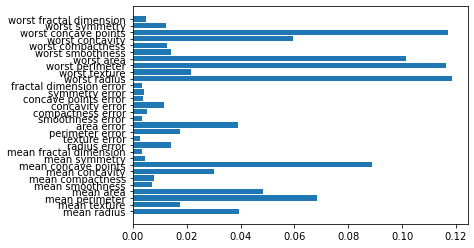

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

#어떤 ㄴ특성을 더 즁요시하나 보자 ~
# 중요한 특성을 시각화하는 함수 ( 사용한 모델, 출력할 특성의 수 )
def plot_feature_importance(model, n_features):
    #바차트로 표시
    plt.barh(range(n_features), model.feature_importances_)  # .feature_importance 각 특징의 중요성
    # y좌표에 눈금의 이름을 표시 
    plt.yticks(np.arange(n_features),cancer.feature_names)
    
    
# cancer.data.shape[1] : 유방암 데이터의 특성의 수를 설정   
plot_feature_importance(rf, cancer.data.shape[1])

#이러면 어떤 특징들이 중요한건지 뜸
#바차트 ㄱ막대기가 긴게 중요한 특성들임

#라벨과 관련이 높은애들을 선택해야함 (라벨에 영향을 많이주는애들)  -> 이걸 랜덤포레스트가 도와줌

In [55]:
cancer.data.shape

(569, 30)

In [56]:
#양성으로갈지 음성으로 갈지 예측
pred = rf.predict(X_test[1].reshape(1,-1))
print(pred)
print(y_test[1])

[0]
0


In [57]:
# AdaBoost
#- 이전 모델의 잘못 분류된 데이터에 가중치를 높이거나 낮추어서 다음 모델을 학습시키는 방법
#- 최종적으로 학습된 모델들에 거중평균을 구해서 최종적으로 분류하는 모델

# 문제 : 얼마만큼 크기를 잡아 줄일건지가 문제 

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# n_estimators : 트리의 개수(max_depth와 유사한의미)
ada = AdaBoostClassifier(n_estimators = 100, random_state = 7)

ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [59]:

print("훈련 정확도 : ", ada.score(X_train,y_train))
print("테스트 정확도 : ", ada.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


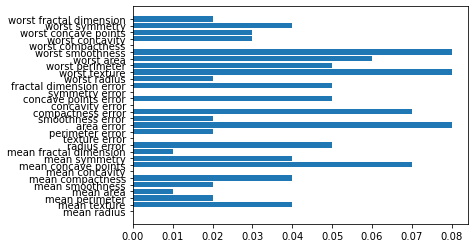

In [60]:
plot_feature_importance(ada, cancer.data.shape[1])

# GBM (Gradient Boost Machine)
- 잘 못 분류된 데이터를 조정하는 방식으로 경사하강법을 사용( 오차가 가장 적은값)

- 파라미터
    - learning_rate ( 학습율) : 얼마씩 줄여갈 것인지 비율

In [61]:
from sklearn.ensemble import GradientBoostingClassifier 

gbc = GradientBoostingClassifier(random_state =  7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=7)

In [62]:

print("훈련 정확도 : ", gbc.score(X_train,y_train))
print("테스트 정확도 : ", gbc.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.965034965034965


In [63]:
# 과대 적합을 감소시키는 방법
#    - max_depth 파라미터로 가지치기 하는방법
#    - learning_rate 파라미터로 학습률을 조정하는 방법

gbc1 = GradientBoostingClassifier(random_state = 7, max_depth = 1)
gbc1.fit(X_train,y_train)


print("훈련 정확도 : ", gbc1.score(X_train,y_train))
print("테스트 정확도 : ", gbc1.score(X_test,y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.972027972027972


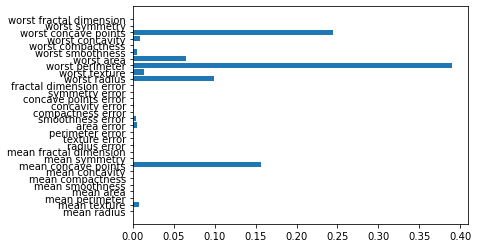

In [64]:
plot_feature_importance(gbc1, cancer.data.shape[1])

# Xgboost
- GBM의 느린속도를 개선하기 위해 분산처리, Early Stopping을 지원
- 과대적합을 방지하기 위한 규제를 사용

In [65]:
! pip install xgboost

In [66]:
import xgboost
from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier(random_state = 7 , max_depth = 1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:

print("훈련 정확도 : ", xgbc.score(X_train,y_train))
print("테스트 정확도 : ", xgbc.score(X_test,y_test))

훈련 정확도 :  0.9976525821596244
테스트 정확도 :  0.9790209790209791


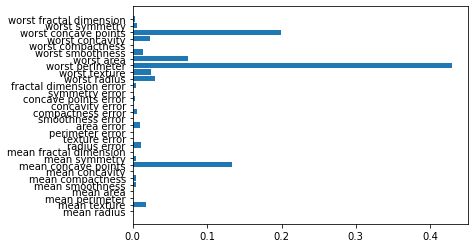

In [68]:
plot_feature_importance(xgbc, cancer.data.shape[1])

## KNN
- 스케일링이 많은 영향을 받는 KNN모델

In [69]:
# 모델로드
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [72]:
# 스케일링 없이 학습 먼저해보자
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9440559440559441

In [74]:
# 스케일링 진행 후 학습
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

stand_scaler = StandardScaler()


In [75]:
# 변환부터 해보기
# 변환해야 하는 값을 학습해서 어떤 범위로 조정해줘야하는지를 학습 - 데이터를 스탠다드에 집어넣으려면 평균이 0이고 분산이 1로 만드려고 집어넣는거 - 그래서 그렇게 바꾸려면 조정할 범위를 알아야함)
 
stand_scaler.fit(X_train)

StandardScaler()

In [78]:
# 학습 후 위에서 학습한 해당 범위로 변환
X_train_scale = stand_scaler.transform(X_train)
X_test_scale = stand_scaler.transform(X_test)

In [79]:
X_train

array([[1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [1.578e+01, 2.291e+01, 1.057e+02, ..., 2.034e-01, 3.274e-01,
        1.252e-01],
       [1.222e+01, 2.004e+01, 7.947e+01, ..., 8.088e-02, 2.709e-01,
        8.839e-02],
       ...,
       [1.169e+01, 2.444e+01, 7.637e+01, ..., 1.308e-01, 2.803e-01,
        9.970e-02],
       [1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
        9.333e-02],
       [8.671e+00, 1.445e+01, 5.442e+01, ..., 0.000e+00, 2.592e-01,
        7.848e-02]])

In [80]:
X_train_scale

array([[-0.84919185,  2.3210039 , -0.89422829, ..., -1.78191453,
        -2.25235328, -1.39421644],
       [ 0.41769327,  0.81989466,  0.51096163, ...,  1.30322634,
         0.58210559,  2.25851416],
       [-0.56704713,  0.15299318, -0.54122597, ..., -0.55513875,
        -0.35552278,  0.22590625],
       ...,
       [-0.71365174,  1.17542053, -0.66557906, ...,  0.20204037,
        -0.19952797,  0.85043207],
       [-0.1382978 ,  0.67582535, -0.09355484, ...,  0.75566692,
         0.26015886,  0.49868764],
       [-1.54874479, -1.14595429, -1.54607917, ..., -1.78191453,
        -0.54968653, -0.32131311]])

In [81]:
#이걸 Knn모델에 학습을시키고 결과까지보자
knn.fit(X_train_scale,y_train)
knn.score(X_test_scale,y_test)

0.958041958041958

In [ ]:
# fit_transform 은 train과 test가 분리되지 않았을때 사용
# fit / trasnfrom은 train과 test가 분리되지 않았을때 

# GridSearch

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# max_depth
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
# max_depth > 2 ~8
# min_samples_leafs  > 20~50
# max_leaf_nodes > 10~20

#그리드서치 할때 생각해 줘야하는게 

In [96]:
# 학습할 하이퍼파라미터를 딕셔너리 형태로 저장( 그리드서치하려면 얘네들을 딕셔너리형태로 바꿔놔야함)
param_grid = {
    'max_depth' : [2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_leaf_nodes' : [15,17,19,21,23,25]
}

In [88]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid, cv=5)
# 앞에는 속성이름, 뒤에있는건 우리가만들어논 변수이름

In [92]:
import warnings
warnings.filterwarnings(action='ignore')

In [99]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [1, 3, 6, 9],
                         'min_samples_leaf': [20, 30, 40, 50]})

In [100]:
# best_params_ : 가장 좋았을때의 파라미터
grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 20}

In [101]:
# best_score_ : 가장 좋았을때의 점수
grid_search.best_score_

0.9131053351573188